In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [17]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

#### The advantage with Decision Tree is that We don't need to Standardize the Data

### Decision Tree

In [27]:
clf = DecisionTreeClassifier(max_depth=2, 
                            random_state=0)

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [31]:
#Predict for one observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))

C:\Users\adrie\Downloads\test\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [32]:
y_test[0:10]

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
Name: target, dtype: int32

In [33]:
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [35]:
score = clf.score(X_test, y_test)
print(score)

0.8947368421052632


### Finding the Optimal Max-Depth

In [36]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

C:\Users\adrie\AppData\Local\Temp\ipykernel_12432\1914883130.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_ticklist)


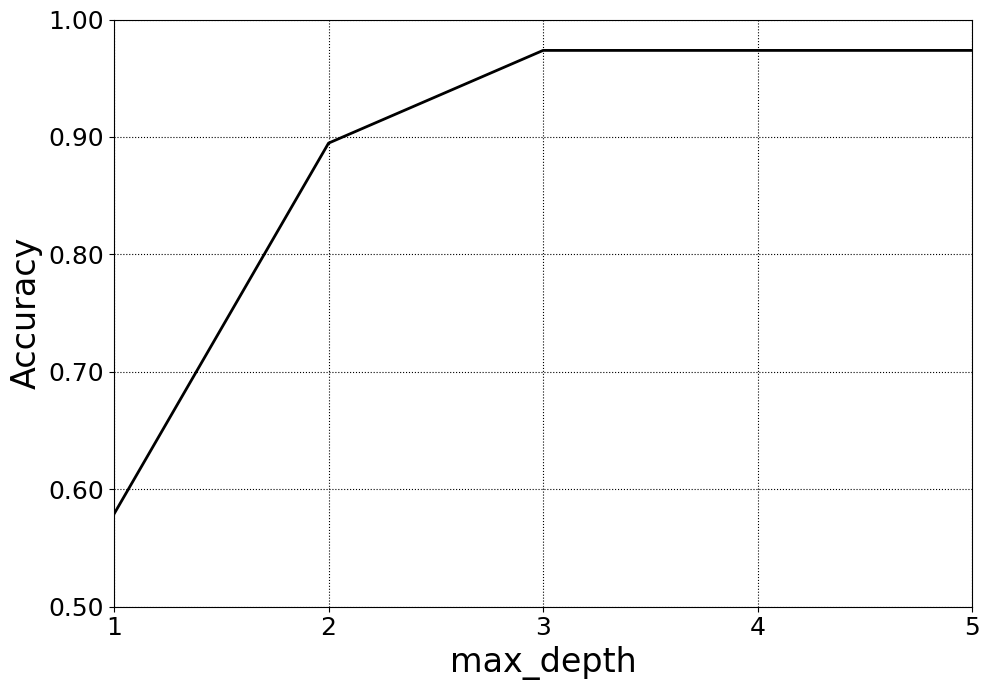

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)